# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [2]:
# 1

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [3]:
# 2
y, X = patsy.dmatrices('tip ~ sex + net_bill + 1', tips)
X

DesignMatrix with shape (244, 3)
  Intercept  sex[T.Female]  net_bill
          1              1     15.98
          1              0      8.68
          1              0     17.51
          1              0     20.37
          1              1     20.98
          1              0     20.58
          1              0      6.77
          1              0     23.76
          1              0     13.08
          1              0     11.55
          1              0      8.56
          1              1     30.26
          1              0     13.85
          1              0     15.43
          1              1     11.81
          1              0     17.66
          1              1      8.66
          1              0     12.58
          1              1     13.47
          1              0     17.30
          1              0     13.84
          1              1     17.54
          1              1     13.54
          1              0     31.84
          1              0     16.64
     

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           6.94e-22
Time:                        19:14:52   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3382      0.185      7.218

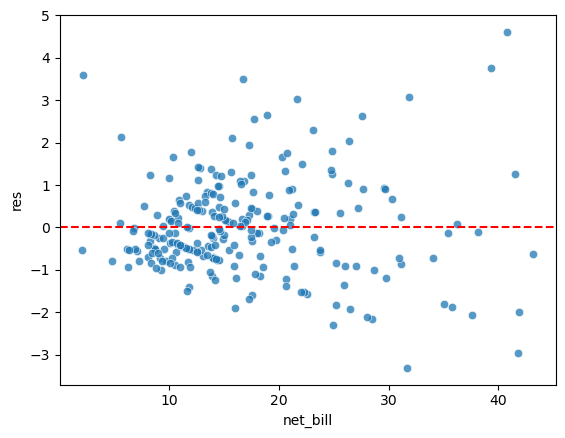

In [4]:
# 3
modelo = sm.OLS(y,X).fit()
print(modelo.summary())

tips['res'] = modelo.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.30
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           5.54e-19
Time:                        19:15:12   Log-Likelihood:                -382.39
No. Observations:                 244   AIC:                             770.8
Df Residuals:                     241   BIC:                             781.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2400      0.447  

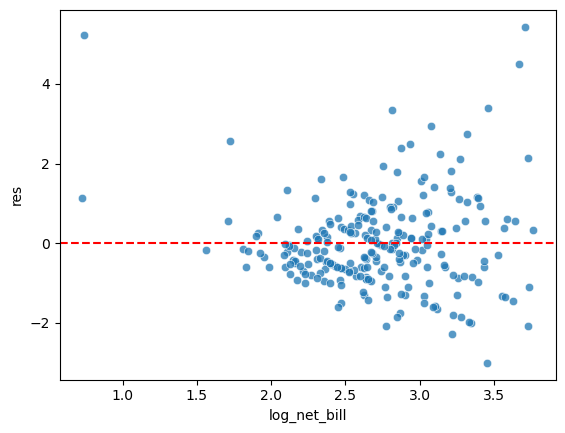

In [5]:
# 4 - log
results_log = smf.ols('''
                    tip ~ sex 
                          + np.log(net_bill)
                          + 1
                  ''', tips).fit()

print(results_log.summary())

tips['log_net_bill'] = np.log(tips['net_bill'])
tips['res'] = results_log.resid
sns.scatterplot(x = 'log_net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [7]:
## 4 - log - R²

tips['pred_log'] = results_log.fittedvalues

r_log = tips[['pred_log', 'tip']].corr().iloc[0,1]
r_log

0.5426809785403498

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     51.90
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.81e-19
Time:                        19:17:18   Log-Likelihood:                -381.26
No. Observations:                 244   AIC:                             768.5
Df Residuals:                     241   BIC:                             779.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.27

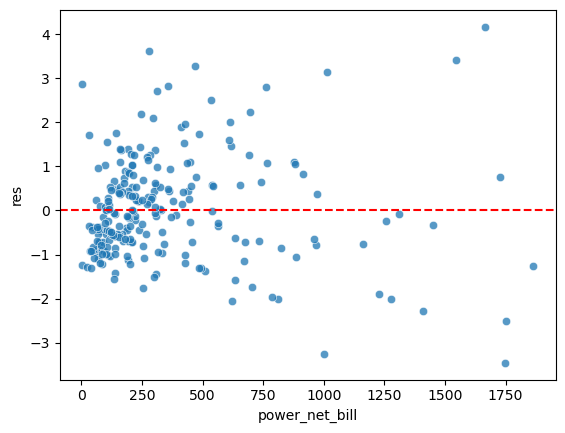

In [8]:
# 4 - polin
results_power = smf.ols('''
                    tip ~ sex 
                          + np.power(net_bill,2)
                          + 1
                  ''', tips).fit()

print(results_power.summary())

tips['power_net_bill'] = np.power(tips['net_bill'],2)
tips['res'] = results_power.resid
sns.scatterplot(x = 'power_net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [9]:
## 4 - poly - R²

tips['pred_power'] = results_power.fittedvalues

r_poly = tips[['pred_power', 'tip']].corr().iloc[0,1]
r_poly

0.5486610192489381

In [10]:
# Comparando o valor de R² temos:

print('R² para log:', r_log)
print('R² para poly:', r_poly)

R² para log: 0.5426809785403498
R² para poly: 0.5486610192489381


Há pouca diferença, os dois modelos são melhores que o original que apresenta R² igual a 0.333.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [12]:
# 1

y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [13]:
# 2

y, X = patsy.dmatrices('tip_pct ~ sex + net_bill + 1', tips)
X

DesignMatrix with shape (244, 3)
  Intercept  sex[T.Female]  net_bill
          1              1     15.98
          1              0      8.68
          1              0     17.51
          1              0     20.37
          1              1     20.98
          1              0     20.58
          1              0      6.77
          1              0     23.76
          1              0     13.08
          1              0     11.55
          1              0      8.56
          1              1     30.26
          1              0     13.85
          1              0     15.43
          1              1     11.81
          1              0     17.66
          1              1      8.66
          1              0     12.58
          1              1     13.47
          1              0     17.30
          1              0     13.84
          1              1     17.54
          1              1     13.54
          1              0     31.84
          1              0     16.64
     

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     12.24
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           8.69e-06
Time:                        19:20:14   Log-Likelihood:                 108.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     241   BIC:                            -199.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3104      0.026     12.159

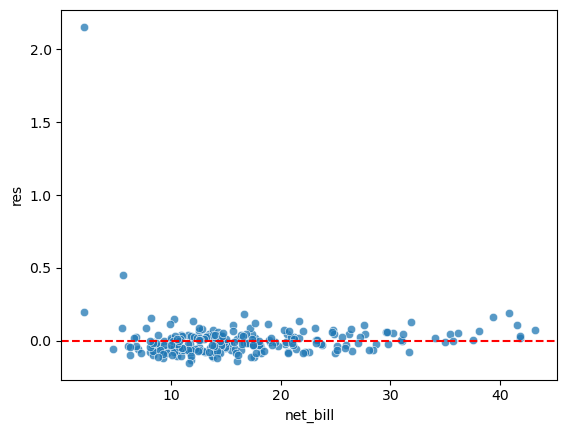

In [14]:
# 3
modelo = sm.OLS(y,X).fit()
print(modelo.summary())

tips['res'] = modelo.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     30.99
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.05e-12
Time:                        19:20:28   Log-Likelihood:                 124.24
No. Observations:                 244   AIC:                            -242.5
Df Residuals:                     241   BIC:                            -232.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6321      0.056  

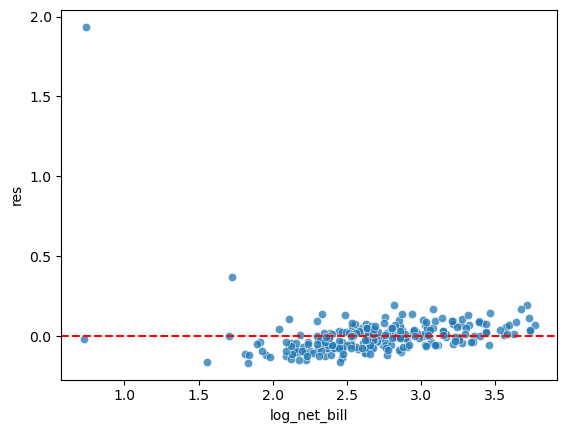

In [15]:
# 4 - log

results_log = smf.ols('''
                    tip_pct ~ sex 
                          + np.log(net_bill)
                          + 1
                  ''', tips).fit()

print(results_log.summary())

tips['log_net_bill'] = np.log(tips['net_bill'])
tips['res'] = results_log.resid
sns.scatterplot(x = 'log_net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     6.746
Date:                Tue, 15 Nov 2022   Prob (F-statistic):            0.00141
Time:                        19:20:46   Log-Likelihood:                 102.97
No. Observations:                 244   AIC:                            -199.9
Df Residuals:                     241   BIC:                            -189.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.24

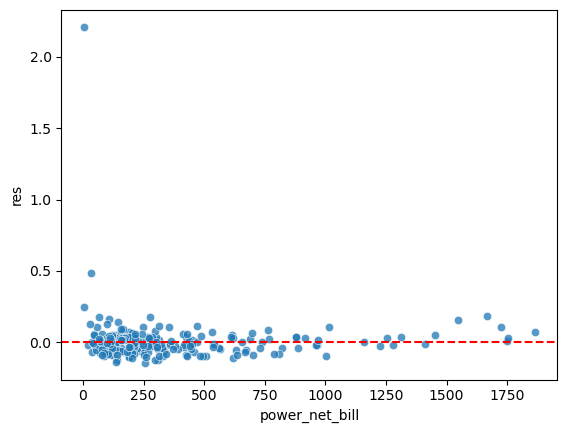

In [16]:
# 4 - poly
results_power = smf.ols('''
                    tip_pct ~ sex 
                          + np.power(net_bill,2)
                          + 1
                  ''', tips).fit()

print(results_power.summary())

tips['power_net_bill'] = np.power(tips['net_bill'],2)
tips['res'] = results_power.resid
sns.scatterplot(x = 'power_net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [17]:
## 4 - R²

tips['pred_log'] = results_log.fittedvalues
tips['pred_power'] = results_power.fittedvalues

r_log = tips[['pred_log', 'tip_pct']].corr().iloc[0,1]
r_poly = tips[['pred_power', 'tip_pct']].corr().iloc[0,1]

print('R² para log:', r_log)
print('R² para poly:', r_poly)

R² para log: 0.45229616271491174
R² para poly: 0.23025592718126814


O  modelo com log é melhor que poly.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [18]:
df_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
print(df_renda.shape)
df_renda.head()

(15000, 16)


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [19]:
# 1

modelo = smf.ols('''
                    renda ~ tempo_emprego
                  ''', df_renda).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:24:46   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

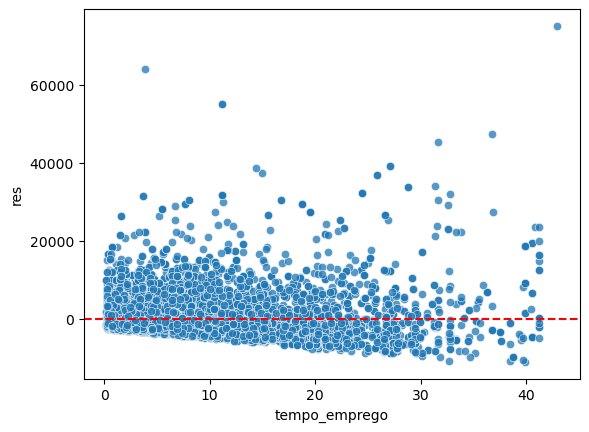

In [20]:
# 2

df_renda['res'] = modelo.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df_renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [21]:
# 3
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + np.power(idade,2) + estado_civil + C(sexo)', df_renda)
X

DesignMatrix with shape (12466, 8)
  Columns:
    ['Intercept',
     'estado_civil[T.Separado]',
     'estado_civil[T.Solteiro]',
     'estado_civil[T.União]',
     'estado_civil[T.Viúvo]',
     'C(sexo)[T.M]',
     'tempo_emprego',
     'np.power(idade, 2)']
  Terms:
    'Intercept' (column 0)
    'estado_civil' (columns 1:5)
    'C(sexo)' (column 5)
    'tempo_emprego' (column 6)
    'np.power(idade, 2)' (column 7)
  (to view full data, use np.asarray(this_obj))

In [22]:
modelo_log = sm.OLS(y,X).fit()

print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     510.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:25:36   Log-Likelihood:                -13358.
No. Observations:               12466   AIC:                         2.673e+04
Df Residuals:                   12458   BIC:                         2.679e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [23]:
# 4

y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + standardize(idade) + C(sexo)', df_renda)

modelo_log = sm.OLS(y,X).fit()

print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     1185.
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:25:57   Log-Likelihood:                -13365.
No. Observations:               12466   AIC:                         2.674e+04
Df Residuals:                   12462   BIC:                         2.677e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.6315      0

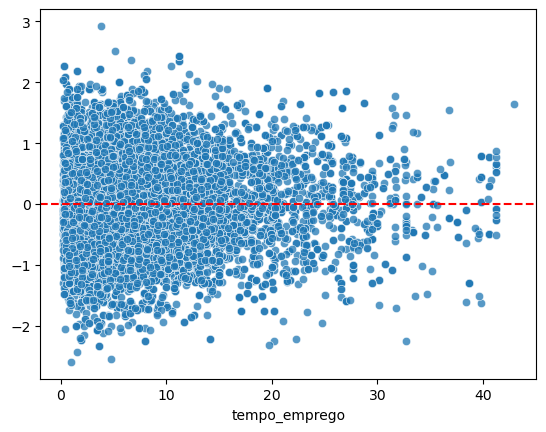

In [24]:
res_log = modelo_log.resid
sns.scatterplot(x = df_renda.dropna()['tempo_emprego'], y = res_log, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [25]:
# 5 
# ajuste não está bom, vemos que os resíduos tem uma caracterpistica de variância decrescente.